# <font color = lightcoral>Setting Random Seed
>    
### <font color = red> Non-Overlapping Windows

> Running Combinations for Non-Overlapping Transformer Models
>

#### <font color = tomato> Prior run
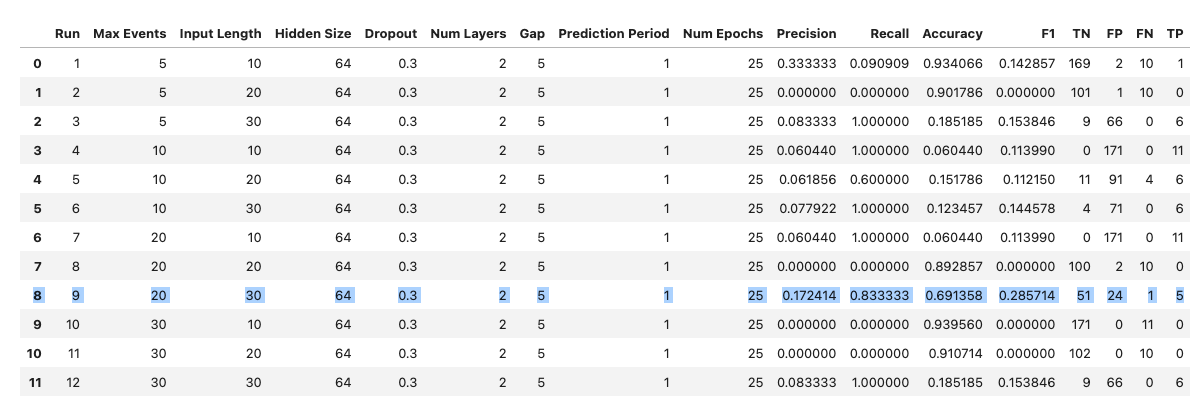

#### <font color = tomato> Prior Run
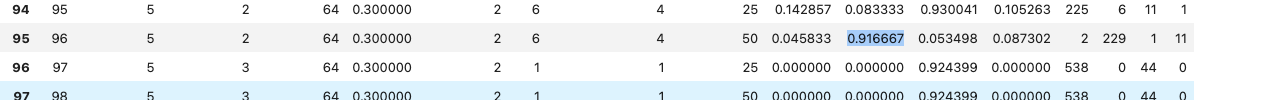

#### <font color = tomato> Current Run
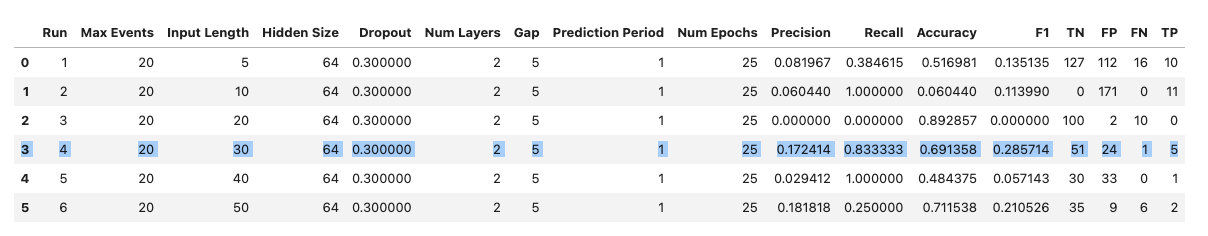

## <font color = grey> Admin

In [1]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
import time
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

import warnings
warnings.simplefilter("ignore")


Base directory set to: /home/sagemaker-user


---

## <font color = lightsteelblue>EDA of Parsed Source File

---

In [2]:
# import pandas as pd
# import time

# # Define the path to the CSV file
# # file_path = "/root/08.GIT_Repos_REF/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/BGL.log_structured.csv"

# # file_path = os.path.join(base_dir, '/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/BGL.log_structured.csv')
# # file_path = os.path.join(base_dir, '/home/ubuntu/efs-w210-capstone-ebs/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/20240701_BGL_Log_Structuted_v1.00.csv')
# file_path = os.path.join(base_dir,'/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/09.20240704_parsed_bgl/BGL.log_structured.csv')
# # file_path = os.path.join(base_dir,'/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/09.20240704_parsed_bgl/BGL_Sample.log_structured.csv')

# # Start timing
# start_time = time.time()

# # Read the CSV file
# df = pd.read_csv(file_path)

# # Section 1: Preview
# print("\n" + "*"*100)
# print("********************** Section 1: Preview ******************************************")
# print("*"*100 + "\n")
# display(df.head())

# # Section 2: Shape of the DataFrame
# print("\n" + "*"*100)
# print("********************** Section 2: Shape of the DataFrame ****************************")
# print("*"*100 + "\n")
# print(df.shape)

# # Section 3: DataFrame Information
# print("\n" + "*"*100)
# print("********************** Section 3: DataFrame Information ****************************")
# print("*"*100 + "\n")
# print(df.info())

# # Section 4: Summary Statistics (without scientific notation)
# print("\n" + "*"*100)
# print("********************** Section 4: Summary Statistics *******************************")
# print("*"*100 + "\n")
# pd.options.display.float_format = '{:,.0f}'.format
# print(df.describe())

# # Section 5: Unique Event Templates
# print("\n" + "*"*100)
# print("********************** Section 5: Unique Event Templates ***************************")
# print("*"*100 + "\n")
# print(df['EventTemplate'].nunique())

# # Section 6: Count of Each Event Template
# print("\n" + "*"*100)
# print("********************** Section 6: Count of Each Event Template *********************")
# print("*"*100 + "\n")
# print(df['EventTemplate'].value_counts().head())

# # Section 7: Most Frequent Event Templates with Counts (ordered by occurrences)
# print("\n" + "*"*100)
# print("********************** Section 7: Most Frequent Event Templates *********************")
# print("*"*100 + "\n")
# df_sorted = df.groupby(['EventId', 'EventTemplate']).size().reset_index(name='Occurrences')
# df_sorted = df_sorted.sort_values(by='Occurrences', ascending=False).reset_index(drop=True)
# df_sorted.index += 1  # Make the index start from 1
# print(df_sorted.head())

# # Section 8: Alert Analysis
# print("\n" + "*"*100)
# print("********************** Section 8: Alert Analysis ************************************")
# print("*"*100 + "\n")

# # Count of normal vs alert logs
# label_counts = df['Label'].value_counts()
# print(f"Normal logs: {label_counts.get('-', 0)}")
# print(f"Alert logs: {label_counts.sum() - label_counts.get('-', 0)}")

# # Most frequent labels for alerts
# alert_labels = df[df['Label'] != '-']['Label'].value_counts().head()
# print("\nMost frequent alert labels:")
# print(alert_labels)

# # Distribution of alert levels
# alert_levels = df[df['Label'] != '-']['Level'].value_counts()
# print("\nDistribution of alert levels:")
# print(alert_levels)

# # Section 9: Label and Alert Level Analysis
# print("\n" + "*"*100)
# print("********************** Section 9: Label and Alert Level Analysis ********************")
# print("*"*100 + "\n")

# # Distribution of values in the Label column with an indicator for normal or alert
# df['LogType'] = df['Label'].apply(lambda x: 'Normal' if x == '-' else 'Alert')
# label_distribution = df.groupby(['LogType', 'Label']).size()
# print("\nDistribution of values in the Label column with an indicator for normal or alert:")
# display(label_distribution)

# # Distribution of values in the Level column for alerts
# alert_level_distribution = df[df['LogType'] == 'Alert'].groupby('Level').size().reset_index(name='count')
# alert_level_distribution['LogType'] = 'Alert'
# print("\nDistribution of values in the Level column for alerts:")
# display(alert_level_distribution[['LogType', 'Level', 'count']])

# # Distribution of values in the Level column for normal logs with an indicator for normal or alert
# normal_level_distribution = df[df['LogType'] == 'Normal'].groupby('Level').size().reset_index(name='count')
# normal_level_distribution['LogType'] = 'Normal'
# print("\nDistribution of values in the Level column for normal logs with an indicator for normal or alert:")
# display(normal_level_distribution[['LogType', 'Level', 'count']])

# # Section 10: Combined LogType, Label, Level, and Count
# print("\n" + "*"*100)
# print("********************** Section 10: Combined LogType, Label, Level, and Count ********")
# print("*"*100 + "\n")

# combined_distribution = df.groupby(['LogType', 'Label', 'Level']).size().reset_index(name='count')
# combined_distribution = combined_distribution.sort_values(by=['LogType', 'count', 'Label'], ascending=[False, False, True])
# display(combined_distribution)

# # Section 11: Count Unique Values in Each Column
# print("\n" + "*"*100)
# print("********************** Section 11: Count Unique Values in Each Column ****************")
# print("*"*100 + "\n")
# print(df.nunique())

# # Section 12: Random Sample of 10 Alert Rows
# print("\n" + "*"*100)
# print("********************** Section 12: Random Sample of 10 Alert Rows ********************")
# print("*"*100 + "\n")
# alert_rows = df[df['Label'] != '-']
# sample_alert_rows = alert_rows.sample(n=10) if len(alert_rows) >= 10 else alert_rows
# display(sample_alert_rows)

# # Section 13: Analysis of Rows for Normal and Alert Labels
# print("\n" + "*"*100)
# print("********************** Section 13: Analysis of Rows for Normal and Alert Labels ********")
# print("*"*100 + "\n")

# # Grouping by LogType to count rows for Normal and Alert logs
# logtype_counts = df['LogType'].value_counts()
# total_logs = logtype_counts.sum()
# normal_percentage = (logtype_counts['Normal'] / total_logs) * 100
# alert_percentage = (logtype_counts['Alert'] / total_logs) * 100

# print(f"Normal logs: {logtype_counts['Normal']} ({normal_percentage:.2f}%)")
# print(f"Alert logs: {logtype_counts['Alert']} ({alert_percentage:.2f}%)")

# # End timing
# end_time = time.time()
# duration = end_time - start_time
# print("\n" + "_"*100)
# print(f"\nTime taken: {duration:.2f} seconds")
# print("\n" + "_"*100)

---

## <font color = lightsteelblue>EDA of Final Features File


****************************************************************************************************
********************** Section 1: Preview ******************************************
****************************************************************************************************



,time_start,time_start_int,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,EventId_1,EventId_2
4,2005-06-03 16:00:00,4,0,6,228,6,0.171708,16,4,465,35431,913.0,0.012903,0,0.000000,0.171708,4895.0,18.0,228,228
5,2005-06-03 16:05:00,5,0,2,987,2,0.598270,16,4,7,35433,465.0,0.285714,0,0.171708,0.426562,4257.0,19.0,729,987
6,2005-06-03 16:10:00,6,0,6,399,18,0.655243,16,4,81,35431,7.0,0.222222,0,0.598270,0.056973,2756.0,23.0,734,430
7,2005-06-03 16:15:00,7,0,5,328,6,1.039660,16,4,66,35431,81.0,0.090909,0,0.655243,0.384418,1532.0,25.0,987,987
8,2005-06-03 16:25:00,9,0,4,399,3,0.895333,16,4,14,35433,66.0,0.214286,0,1.039660,-0.144328,633.0,28.0,95,504



****************************************************************************************************
********************** Section 2: Basic Information ******************************************
****************************************************************************************************

Shape of the DataFrame: (14537, 35451)

Class distribution:
Class
0    13479
1     1058
Name: count, dtype: int64 

Columns with NaN values:
No NaN values found.

Correlation matrix for numerical columns:


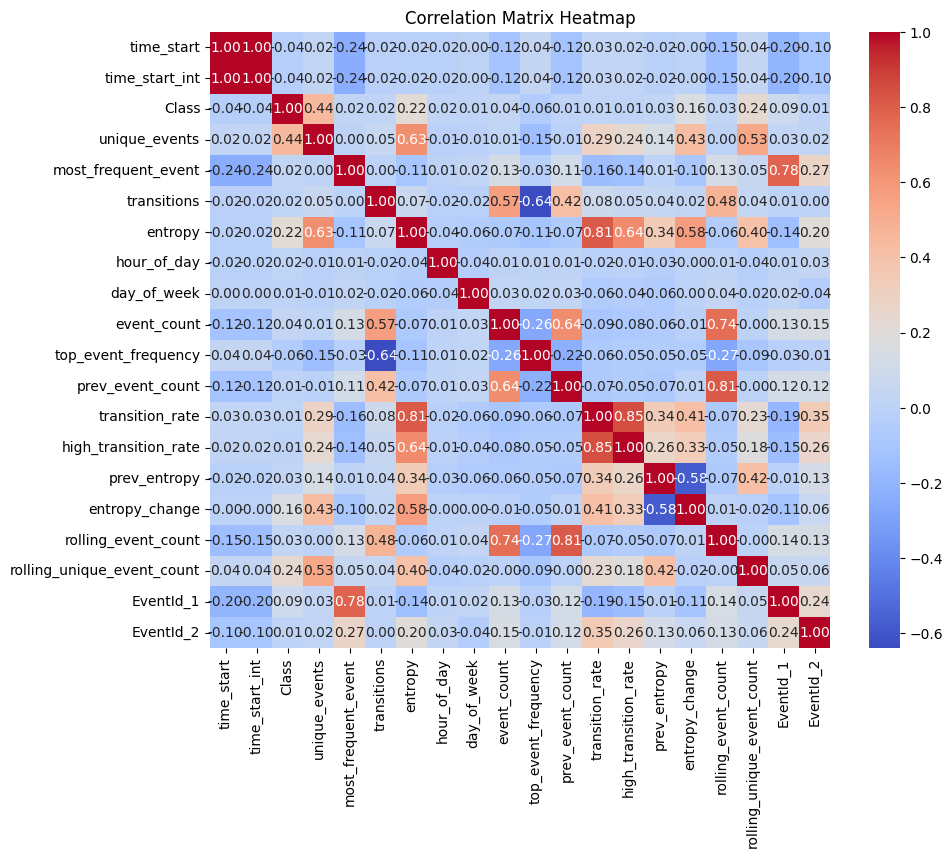

Distribution of 'unique_events' and 'transitions' columns:
       unique_events   transitions
count   14537.000000  14537.000000
mean        3.331224     41.822935
std         6.401868    575.214839
min         1.000000      0.000000
25%         1.000000      0.000000
50%         2.000000      1.000000
75%         4.000000      7.000000
max       114.000000  17910.000000 


****************************************************************************************************
********************** Section 3: Distribution by Class ******************************************
****************************************************************************************************

Distribution of 'transitions' by class:
         count       mean         std  min  25%  50%   75%      max
Class                                                              
0      13479.0  39.048742  581.406852  0.0  0.0  1.0   6.0  17910.0
1       1058.0  77.166352  488.380000  0.0  0.0  5.0  50.0  11812.0 

Distrib

,Class,unique_sequence,transitions,counts
0,0,1-199,952,1
1,0,1-199,2469,1
2,0,1-199,4436,1
3,0,104,365,1
4,0,104,370,1
157,1,561-974,341,2
134,1,121-901-339-203-374-678-540-710-837-864-207-45-272-209-615-483-773-841-603-764-114-138-193-399-556-812-647-156,688,1
135,1,176-561-193-399-556-143,271,1
136,1,176-561-88-143-417,255,1
137,1,176-561-974,400,1



____________________________________________________________________________________________________

Time taken for EDA: 10.16 seconds

____________________________________________________________________________________________________


In [3]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Start timing
start_time = time.time()

data_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/12.20240709_More_New_Features/01.Full_Base'
input_file = f"{data_dir}/20240709_full_more_new_features_v1.00.parquet"
output_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/12.20240709_More_New_Features/02.Full_Train_Test'

# Section 1: Preview
print("\n" + "*"*100)
print("********************** Section 1: Preview ******************************************")
print("*"*100 + "\n")

# Load the parquet file
df = pd.read_parquet(input_file)

# Display the head of the DataFrame
display(df.iloc[:, :20].head())

# Section 2: Basic Information
print("\n" + "*"*100)
print("********************** Section 2: Basic Information ******************************************")
print("*"*100 + "\n")

# 1. Display the shape of the DataFrame
print(f"Shape of the DataFrame: {df.shape}\n")

# 2. Display the class distribution
print("Class distribution:")
print(df['Class'].value_counts(), "\n")

# 3. Check for NaN values and display columns with issues
print("Columns with NaN values:")
nan_columns = df.columns[df.isna().any()].tolist()
if nan_columns:
    print(df[nan_columns].isna().sum(), "\n")
else:
    print("No NaN values found.\n")

# 4. Display correlation matrix for numerical columns as a heatmap
print("Correlation matrix for numerical columns:")
corr_matrix = df.iloc[:, :20].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

# # 5. Display the top 5 rows of the first 20 EventId columns
event_id_columns = [col for col in df.columns if col.startswith('EventId_')]
# print("Top 5 rows of the first 20 EventId columns:")
# print(df[event_id_columns[:20]].head(), "\n")

# 6. Display the distribution of 'unique_events' and 'transitions' columns
print("Distribution of 'unique_events' and 'transitions' columns:")
print(df[['unique_events', 'transitions']].describe(), "\n")

# Section 3: Distribution by Class
print("\n" + "*"*100)
print("********************** Section 3: Distribution by Class ******************************************")
print("*"*100 + "\n")

# 1. Distribution of 'transitions' by class
print("Distribution of 'transitions' by class:")
print(df.groupby('Class')['transitions'].describe(), "\n")

# 2. Distribution of 'unique_events' by class
print("Distribution of 'unique_events' by class:")
print(df.groupby('Class')['unique_events'].describe(), "\n")

# Section 4: Common Sequences
print("\n" + "*"*100)
print("********** Section 4: Top 5 Most Common Unique Event Sequences by Class with Sampling ***************")
print("*"*100 + "\n")

# Sampling 1% from class 0 and 5% from class 1 based on maximum transitions
class_0_sample = df[df['Class'] == 0].nlargest(int(len(df[df['Class'] == 0]) * 0.01), 'transitions')
class_1_sample = df[df['Class'] == 1].nlargest(int(len(df[df['Class'] == 1]) * 0.05), 'transitions')

# Combine the samples
sampled_df = pd.concat([class_0_sample, class_1_sample])

# Use a subset of EventId columns for processing
subset_event_id_columns = event_id_columns[:100]  # Adjust this number as needed

# Create sequences of unique events from the subset of EventId columns
sampled_df['unique_sequence'] = sampled_df[subset_event_id_columns].apply(lambda row: '-'.join(row.astype(str).unique()), axis=1)

# Calculate the top 5 most common unique sequences by class, including transitions
top_unique_sequences_sampled = sampled_df.groupby(['Class', 'unique_sequence', 'transitions']).size().reset_index(name='counts').sort_values(['Class', 'counts'], ascending=[True, False]).groupby('Class').head(5)

# Display the top unique sequences with transitions
display(top_unique_sequences_sampled)

# End timing
end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken for EDA: {duration:.2f} seconds")
print("\n" + "_"*100)


___
# <font color = darkkhaki> (D). Data Prep --> Create sample for sanity testing

In [4]:
# import pandas as pd

# # Load the data
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/09.20240704_parsed_bgl'
# input_file = f"{data_dir}/20240704__full__new_features_v1.10.parquet"
# df = pd.read_parquet(input_file)

# # Split the data
# train_size = int(0.8 * len(df))
# train_df = df[:train_size]
# test_df = df[train_size:]

# # Save the splits
# train_output_file = f"{data_dir}/20240704__train__new_features_v1.10.parquet"
# test_output_file = f"{data_dir}/20240704__test__new_features_v1.10.parquet"

# train_df.to_parquet(train_output_file)
# test_df.to_parquet(test_output_file)

In [5]:
# import pandas as pd

# ####################### Full Base ######################################
# # data_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/10.20240705_StartOver_NewFeatures/01.Full_Base/'
# # input_file = f"{data_dir}/20240704__full__new_features_v1.10.parquet"

# ####################### Sample Base ######################################
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/10.20240705_StartOver_NewFeatures/03.Sample_Base/'
# input_file = f"{data_dir}/20240704__sample__new_features_v1.50.parquet"

# ####################### Full Test_Train ######################################
# # data_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/10.20240705_StartOver_NewFeatures/02.Full_Train_Test/'
# # input_file = f"{data_dir}/20240704__train__new_features_v1.10.parquet"
# # input_file = f"{data_dir}/20240704__test__new_features_v1.10.parquet"

# ####################### Sample Test_Train ######################################
# # data_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/10.20240705_StartOver_NewFeatures/04.Sample_Train_Test/'
# # input_file = f"{data_dir}/20240705_train_claude.parquet"
# # input_file = f"{data_dir}/20240705_test_claude.parquet"
# # input_file = f"{data_dir}/X_train.parquet"

# # Read the parquet file
# df = pd.read_parquet(input_file)

# # Count the number of rows
# row_count = len(df)

# print("*"*100 + "\n")
# print("************************************** # Rows ********************************")

# print(f"The number of rows in the parquet file is: {row_count}")

# # print("*"*100 + "\n")
# print("************************************** Distinct Records by Class ****************")

# # Count the number of distinct records by Class
# distinct_class_counts = df['Class'].value_counts()

# print(f"The count of distinct records by Class is:\n{distinct_class_counts}")

# print("************************************** Shape ***************************")

# print(df.shape)

# print("************************************** Columns *************************")

# print(df.columns)

# # print("*"*100 + "\n")
# print("************************************** Display Sample ********************************")

# # Select the first 8 columns (assuming they exist)
# first_eight_columns = df.iloc[:, :12]  # Use indexing for columns

# # Display the first few rows of the selected columns
# display(first_eight_columns.head(5))

----

# <font color = tomato> Loop

In [ ]:
################################### Parameters and Hyperparameters ################################

# Parameters and Hyperparameters
data_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/12.20240709_More_New_Features/01.Full_Base'
input_file = f"{data_dir}/20240709_full_more_new_features_v1.00.parquet"
output_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/12.20240709_More_New_Features/02.Full_Train_Test'

# Generate timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
results_file = f"{output_dir}/{timestamp}_results_df.csv"

# Hyperparameter variations to test
# max_events_list = [20, 30, 40]  # Different values to test
# hidden_size_list = [64]  # Different values to test
# dropout_list = [0.3]  # Different values to test
# num_layers_list = [2, 4]  # Different values to test
# input_length_list = [10, 20]  # Different values to test
# gap_list = [1,5, 10]  # Different values to test
# prediction_period_list = [1,  5]  # Different values to test
# num_epochs_list = [10, 25, 50]  # Different values to test

max_events_list = [20]  # Different values to test
hidden_size_list = [64]  # Different values to test
dropout_list = [0.3]  # Different values to test
num_layers_list = [2, 4]  # Different values to test
input_length_list = [30]  # Different values to test
gap_list = [5]  # Different values to test
prediction_period_list = [1]  # Different values to test
num_epochs_list = [25]  # Different values to test

test_size = 0.2
shuffle = False

output_size = 1
batch_size = 16
learning_rate = 0.001

import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# DataFrame to track results
results_df = pd.DataFrame(columns=['Run', 'Max Events', 'Input Length', 'Hidden Size', 'Dropout', 'Num Layers', 'Gap', 'Prediction Period', 'Num Epochs', 'Precision', 'Recall', 'Accuracy', 'F1', 'TN', 'FP', 'FN', 'TP'])

run_id = 0

# Start timing
start_time = time.time()

for max_events in max_events_list:
    for input_length in input_length_list:
        for hidden_size in hidden_size_list:
            for dropout in dropout_list:
                for num_layers in num_layers_list:
                    for gap in gap_list:
                        for prediction_period in prediction_period_list:
                            for num_epochs in num_epochs_list:
                                run_id += 1
                                print(f"Run {run_id}: max_events={max_events}, input_length={input_length}, hidden_size={hidden_size}, dropout={dropout}, num_layers={num_layers}, gap={gap}, prediction_period={prediction_period}, num_epochs={num_epochs}")

                                # Set random seed for reproducibility
                                random_seed = 42
                                np.random.seed(random_seed)
                                random.seed(random_seed)
                                torch.manual_seed(random_seed)
                                torch.cuda.manual_seed(random_seed)

                                ################################### Data Preprocessing ################################

                                # Load the data
                                df = pd.read_parquet(input_file)

                                # Select derived features and a subset of EventID columns
                                selected_columns = ['time_start_int', 'Class', 'unique_events', 'most_frequent_event', 'transitions', 'entropy', 
                                                    'hour_of_day', 'day_of_week', 'event_count', 'top_event_frequency', 'prev_event_count', 
                                                    'transition_rate', 'high_transition_rate', 'prev_entropy', 'entropy_change', 
                                                    'rolling_event_count', 'rolling_unique_event_count']
                                event_id_columns = [col for col in df.columns if col.startswith('EventId_')]

                                # Replace -1 values with 0
                                df[event_id_columns].replace(-1, 0, inplace=True)

                                # Scale numerical features
                                scaler = StandardScaler()
                                numerical_features = ['unique_events', 'transitions', 'entropy', 'hour_of_day', 'day_of_week', 'event_count', 
                                                      'top_event_frequency', 'prev_event_count', 'transition_rate', 'prev_entropy', 
                                                      'entropy_change', 'rolling_event_count', 'rolling_unique_event_count']
                                df[selected_columns[2:]] = scaler.fit_transform(df[selected_columns[2:]])

                                # Encode categorical features
                                label_encoder = LabelEncoder()
                                df['most_frequent_event'] = label_encoder.fit_transform(df['most_frequent_event'])

                                # Apply PCA to EventID columns to reduce them to the number of features specified by max_events
                                pca = PCA(n_components=max_events)
                                event_id_pca = pca.fit_transform(df[event_id_columns])

                                # Create a new DataFrame with the reduced EventID features
                                event_id_pca_df = pd.DataFrame(event_id_pca, columns=[f'EventId_PCA_{i+1}' for i in range(max_events)])

                                # Combine the reduced EventID features with the selected columns
                                df_reduced = pd.concat([df[selected_columns], event_id_pca_df], axis=1)

                                # Verify the number of features
                                input_size = df_reduced.shape[1] - 2  # Subtract 2 for 'Class' and 'time_start_int' columns

                                ################################### Create Sequences ################################

                                # # Function to create non-overlapping sequences
                                # def create_sequences(data, time_index_col, feature_cols, target_col, input_length, gap=1, prediction_period=1):
                                #     sequences = []
                                #     targets = []
                                    
                                #     start_idx = 0
                                #     while start_idx + input_length + gap + prediction_period <= len(data):
                                #         end_idx = start_idx + input_length
                                #         sequence = data[feature_cols].iloc[start_idx:end_idx].values
                                #         target = data[target_col].iloc[end_idx + gap:end_idx + gap + prediction_period].values[0]
                                #         sequences.append(sequence)
                                #         targets.append(target)
                                #         start_idx = end_idx + gap + prediction_period  # Move to the next non-overlapping sequence
                                #         # start_idx += 1  # Move to the next row to create overlapping sequences
                                    
                                def create_sequences(data, time_index_col, feature_cols, target_col, input_length, gap=1, prediction_period=1):
                                    sequences = []
                                    targets = []
                                    
                                    start_idx = 0
                                    total_length = len(data)
                                    while start_idx + input_length + gap + prediction_period <= total_length:
                                        end_idx = start_idx + input_length
                                        sequence = data[feature_cols].iloc[start_idx:end_idx].values
                                        target = data[target_col].iloc[end_idx + gap:end_idx + gap + prediction_period].values[0]
                                        sequences.append(sequence)
                                        targets.append(target)
                                        start_idx = end_idx + gap + prediction_period  # Move to the next non-overlapping sequence
                                        # start_idx += 1  # Move to the next row to create overlapping sequences
                                    
                                    return np.array(sequences), np.array(targets)

                                feature_cols = [col for col in df_reduced.columns if col != 'Class']
                                target_col = 'Class'

                                X, y = create_sequences(df_reduced, 'time_start_int', feature_cols, target_col, input_length=input_length, gap=gap, prediction_period=prediction_period)

                                ################################### Split & SMOTE ################################

                                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=shuffle, random_state=random_seed)

                                # Flatten X_train to 2D array for SMOTE
                                X_train = X_train.reshape(X_train.shape[0], -1)

                                # Apply SMOTE
                                smote = SMOTE(random_state=random_seed)
                                X_train, y_train = smote.fit_resample(X_train, y_train)

                                # Reshape X_train back to 3D array
                                n_samples = X_train.shape[0]
                                input_size = X_train.shape[1] // input_length  # Calculate the input size after SMOTE
                                X_train = X_train.reshape(n_samples, input_length, input_size)

                                # Drop the first column from X_train and X_test
                                X_train = X_train[:, :, 1:]
                                X_test = X_test.reshape(X_test.shape[0], input_length, input_size)
                                X_test = X_test[:, :, 1:]

                                ################################### Transformer ################################

                                # Define the Transformer model
                                class TransformerModel(nn.Module):
                                    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.5):
                                        super(TransformerModel, self).__init__()
                                        self.embedding = nn.Linear(input_size, hidden_size)
                                        self.pos_encoder = nn.Embedding(input_length, hidden_size)
                                        self.transformer = nn.Transformer(hidden_size, nhead=4, num_encoder_layers=num_layers, num_decoder_layers=num_layers, dropout=dropout)
                                        self.fc = nn.Linear(hidden_size, output_size)
                                    
                                    def forward(self, x):
                                        x = self.embedding(x)
                                        positions = torch.arange(0, x.size(1), device=x.device).unsqueeze(0)
                                        x = x + self.pos_encoder(positions)
                                        x = self.transformer(x, x)
                                        x = self.fc(x[:, -1, :])
                                        return x

                                # Convert data to PyTorch tensors
                                X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
                                y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
                                X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
                                y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

                                # Create DataLoader
                                train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
                                train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

                                # Initialize the model, loss function, and optimizer
                                model = TransformerModel(input_size - 1, hidden_size, num_layers, output_size, dropout)  # Correct input size
                                criterion = nn.BCEWithLogitsLoss()  # For binary classification
                                optimizer = optim.Adam(model.parameters(), lr=learning_rate)

                                # Training loop
                                for epoch in range(num_epochs):
                                    model.train()
                                    for X_batch, y_batch in train_loader:
                                        outputs = model(X_batch)
                                        loss = criterion(outputs, y_batch)
                                        
                                        optimizer.zero_grad()
                                        loss.backward()
                                        optimizer.step()
                                    
                                    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
                                    
                                ################################### Model Eval ################################

                                # Evaluate the model on the test set
                                model.eval()
                                with torch.no_grad():
                                    test_outputs = model(X_test_tensor)
                                    test_outputs = torch.sigmoid(test_outputs)  # Apply sigmoid to get probabilities
                                    test_outputs = test_outputs.cpu().numpy()

                                    # Convert y_test_tensor to NumPy array only if it is a tensor
                                    if isinstance(y_test_tensor, torch.Tensor):
                                        y_test_tensor = y_test_tensor.cpu().numpy()

                                    test_preds = (test_outputs > 0.5).astype(int)  # Convert probabilities to binary predictions

                                # Calculate evaluation metrics
                                conf_matrix = confusion_matrix(y_test_tensor, test_preds)
                                precision = precision_score(y_test_tensor, test_preds, zero_division=0)
                                recall = recall_score(y_test_tensor, test_preds, zero_division=0)
                                accuracy = accuracy_score(y_test_tensor, test_preds)
                                f1 = f1_score(y_test_tensor, test_preds, zero_division=0)
                                tn, fp, fn, tp = conf_matrix.ravel()

                                # Append results to DataFrame
                                results_df = pd.concat([results_df, pd.DataFrame([{
                                    'Run': run_id,
                                    'Max Events': max_events,
                                    'Input Length': input_length,
                                    'Hidden Size': hidden_size,
                                    'Dropout': dropout,
                                    'Num Layers': num_layers,
                                    'Gap': gap,
                                    'Prediction Period': prediction_period,
                                    'Num Epochs': num_epochs,
                                    'Precision': precision,
                                    'Recall': recall,
                                    'Accuracy': accuracy,
                                    'F1': f1,
                                    'TN': tn,
                                    'FP': fp,
                                    'FN': fn,
                                    'TP': tp
                                }])], ignore_index=True)

                                # Save the results DataFrame to a CSV file
                                results_df.to_csv(results_file, index=False)

                                # Print the results of the current run
                                print(f"Run {run_id} Results: Max Events={max_events}, Input Length={input_length}, Hidden Size={hidden_size}, Dropout={dropout}, Num Layers={num_layers}, Gap={gap}, Prediction Period={prediction_period}, Num Epochs={num_epochs}, Precision={precision:.6f}, Recall={recall:.6f}, Accuracy={accuracy:.6f}, F1={f1:.6f}, TN={tn}, FP={fp}, FN={fn}, TP={tp}")

                                print(f"Run {run_id} completed")
                                print("*"*100 + "\n")

pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Display the results DataFrame
display(results_df)

# End timing
end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken for main loop: {duration:.2f} seconds")
print("\n" + "_"*100)

################################### Plot Results ################################

# Set a pastel color palette
sns.set_palette("pastel")

# Plot the results
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('Model Performance Metrics Over Different Runs')

metrics = ['Precision', 'Recall', 'Accuracy', 'F1', 'TN', 'FP', 'FN', 'TP']
for i, metric in enumerate(metrics):
    ax = axes[i//3, i%3]
    ax.plot(results_df['Run'], results_df[metric])
    ax.set_title(metric)
    ax.set_xlabel('Run')
    ax.set_ylabel(metric)

# Remove the last subplot
fig.delaxes(axes[2, 2])

plt.tight_layout()
plt.show()

Run 1: max_events=20, input_length=30, hidden_size=64, dropout=0.3, num_layers=2, gap=5, prediction_period=1, num_epochs=25
Epoch [1/25], Loss: 0.7276
Epoch [2/25], Loss: 0.7133
Epoch [3/25], Loss: 0.6936
Epoch [4/25], Loss: 0.6792
Epoch [5/25], Loss: 0.6638
Epoch [6/25], Loss: 0.6749
Epoch [7/25], Loss: 0.6992
Epoch [8/25], Loss: 0.7161
Epoch [9/25], Loss: 0.7676
Epoch [10/25], Loss: 0.6532
Epoch [11/25], Loss: 0.6351
Epoch [12/25], Loss: 0.6854
Epoch [13/25], Loss: 0.7428
Epoch [14/25], Loss: 0.7131
Epoch [15/25], Loss: 0.7378
Epoch [16/25], Loss: 0.6828
Epoch [17/25], Loss: 0.6262
Epoch [18/25], Loss: 0.6629
Epoch [19/25], Loss: 0.6747
Epoch [20/25], Loss: 0.6661
Epoch [21/25], Loss: 0.6506
Epoch [22/25], Loss: 0.5660
Epoch [23/25], Loss: 0.5507
Epoch [24/25], Loss: 0.6031
Epoch [25/25], Loss: 0.6415
Run 1 Results: Max Events=20, Input Length=30, Hidden Size=64, Dropout=0.3, Num Layers=2, Gap=5, Prediction Period=1, Num Epochs=25, Precision=0.333333, Recall=0.166667, Accuracy=0.9135